# Calculate pre-tagged control plots for ttbar All-Hadronic Analysis

These are pre-tagged control plots of the QCD sample.
 - QCD MC is `QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8` from 94x. 
 - JetHT dataset, Trigger is OR of
 ```
    'HLT_AK8PFJet400_TrimMass30',
    'HLT_AK8PFJet420_TrimMass30',
    'HLT_AK8PFJet500',
    'HLT_AK8PFJet550',
    'HLT_PFHT1050',
    'HLT_AK8PFHT850_TrimMass50',
    'HLT_AK8PFHT900_TrimMass50',
```
 - $\ge 2$ jets with $p_T > 400$ GeV and $|\eta| < 2.5$
 - Loose jet ID
 - $H_T > 1100$ GeV from AK4 jets (to be on trigger threshold)
 - Substructure plots ($\tau_{32}$ and $N_3$) have $100 < m_{softdrop} < 250$ GeV
 - JECs:
  - L1,L2,L3
  - Defaults from MINIAOD. I THINK they are:
   - 2016: `Summer16_23Sep2016V4`
   - 2017: `Fall17_17Nov2017_V6`
   - 2018: whatever is in prompt reco

Info in <TCanvas::Print>: png file h_ak8pt.png has been created
Info in <TCanvas::Print>: pdf file h_ak8pt.pdf has been created
Info in <TCanvas::Print>: png file h_ak8msd.png has been created
Info in <TCanvas::Print>: pdf file h_ak8msd.pdf has been created
Info in <TCanvas::Print>: png file h_ak8tau32.png has been created
Info in <TCanvas::Print>: pdf file h_ak8tau32.pdf has been created
Info in <TCanvas::Print>: png file h_ak8n3b1.png has been created
Info in <TCanvas::Print>: pdf file h_ak8n3b1.pdf has been created
Info in <TCanvas::Print>: png file h_mttbar.png has been created
Info in <TCanvas::Print>: pdf file h_mttbar.pdf has been created


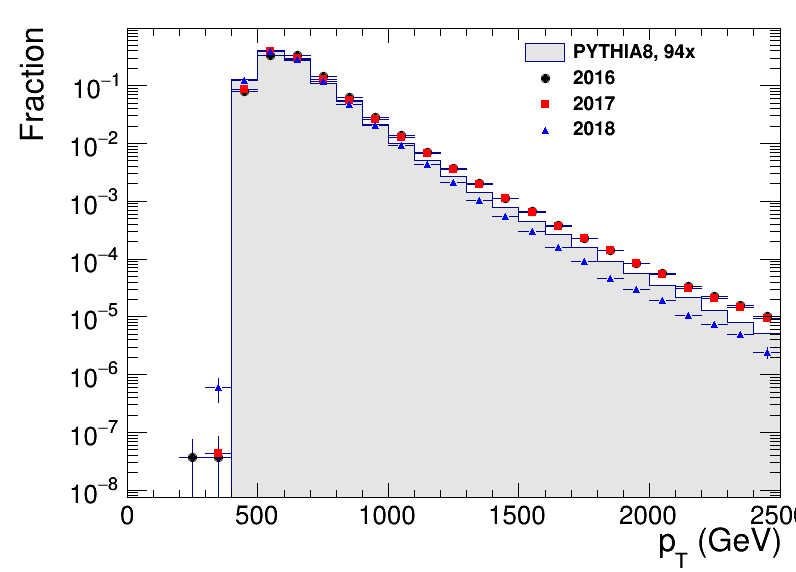

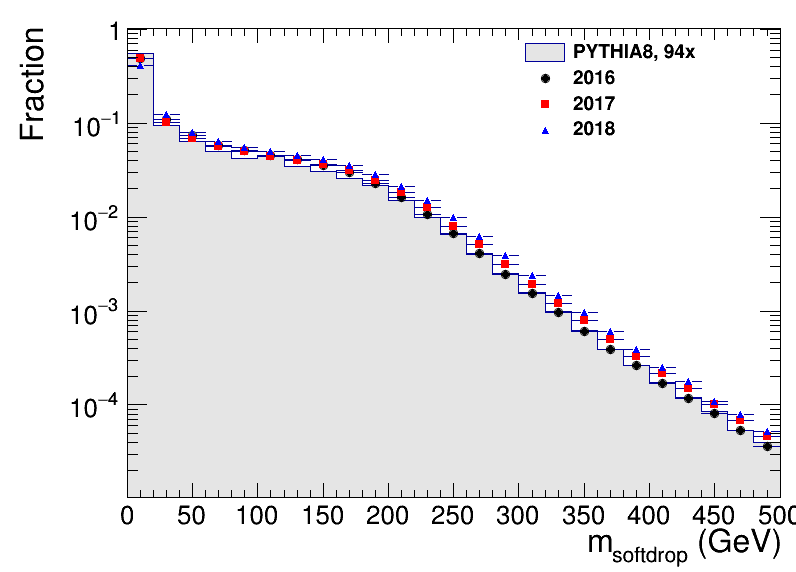

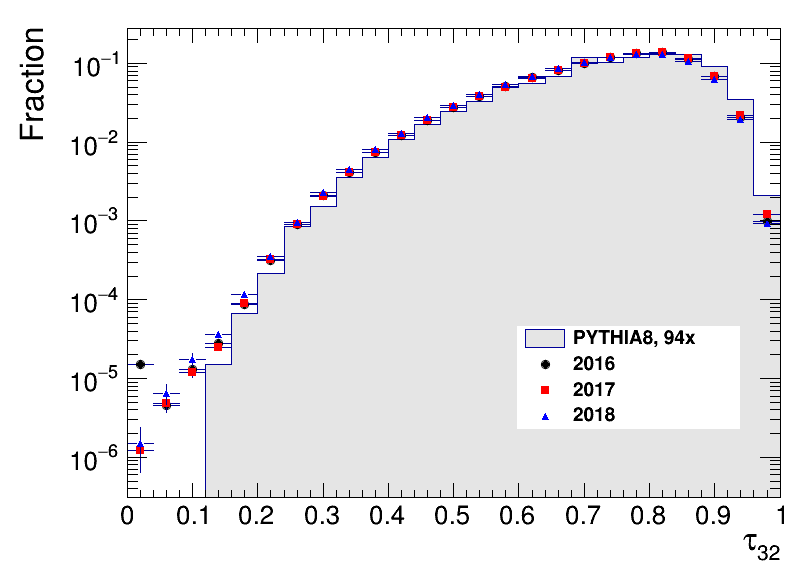

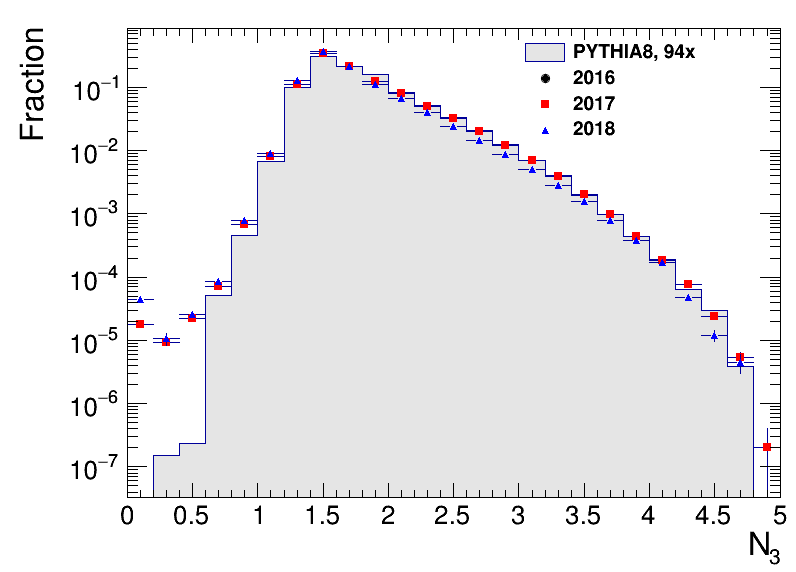

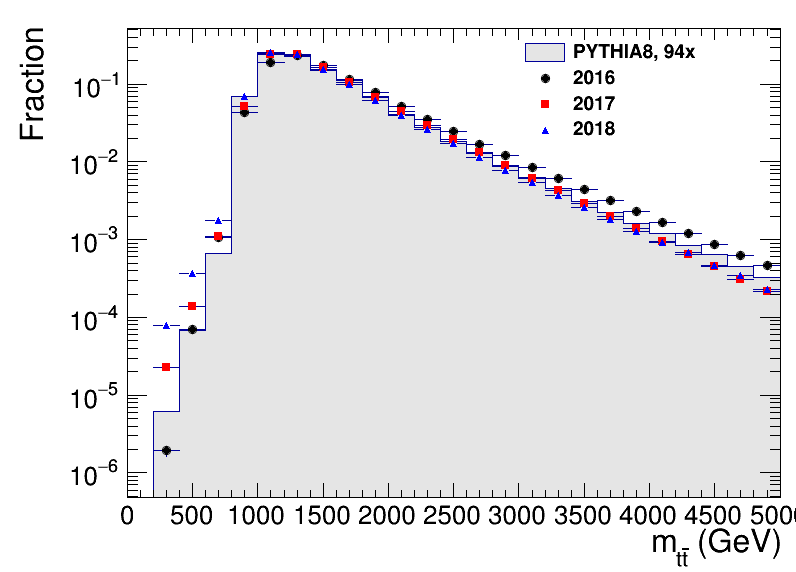

In [26]:
#!/usr/bin/env python

import ROOT
import itertools


from tdrstyle import setTDRStyle


setTDRStyle()

years = ['2016', '2017', '2018']
fnames = [ 'ttbarreshad_controlplots_DijetSkim_Nrp_JetHT_Run%s.root' % (s) for s in years]
files = [ ROOT.TFile(s) for s in fnames ]
f_qcd = ROOT.TFile( 'ttbarreshad_controlplots_DijetSkim_Nrp_QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8_94X.root' )
styles = [20,21,22]
colors = [1,2,4]
histnames = [
    'ttbarres/h_ak8pt',
    'ttbarres/h_ak8msd',
    'ttbarres/h_ak8tau32',
    'ttbarres/h_ak8n3b1',
    'ttbarres/h_mttbar'
]
histtitles = [
    ';p_{T} (GeV); Fraction',
    ';m_{softdrop} (GeV); Fraction',
    ';#tau_{32}; Fraction',
    ';N_{3}; Fraction',
    ';m_{t#bar{t}} (GeV);Fraction'
]
locs = [
    [0.65,0.75,0.93,0.93],
    [0.65,0.75,0.93,0.93],
    [0.65,0.25,0.93,0.43],
    [0.65,0.75,0.93,0.93],
    [0.65,0.75,0.93,0.93],
]
f_qcd.cd("ttbarres")
for f in files:
    f.cd("ttbarres")

canvs = []
legs = []

latex = ROOT.TLatex()
latex.SetNDC()
latex.SetTextFont(42)
latex.SetTextAlign(31) 
latex.SetTextSize(0.05)   
allhists = []
stacks = []

for ihist,histname in enumerate(histnames):
    leg = ROOT.TLegend(locs[ihist][0],locs[ihist][1],locs[ihist][2],locs[ihist][3],)
    leg.SetFillColor(0)
    leg.SetBorderSize(0)
    
    hmc = f_qcd.Get(histname).Clone( histname )
    hmc.SetFillColor(18)
    hmc.SetFillStyle(1001)
    if hmc.Integral() > 0:
        hmc.Scale(1.0/hmc.Integral())
    stack = ROOT.THStack('hs_' + histname, histtitles[ihist])
    stack.Add( hmc, "hist" )
    leg.AddEntry(hmc,  'PYTHIA8, 94x', 'f')
    allhists.append(hmc)
    for iyear,year in enumerate(years):
        h = files[iyear].Get(histname).Clone( histname + '_' + year)
        if h.Integral() > 0:
            h.Scale(1.0/h.Integral())
        h.SetMarkerStyle(styles[iyear])
        h.SetMarkerColor(colors[iyear])
        stack.Add( h, 'e')
        allhists.append(h)
        leg.AddEntry(h, year, 'p')
        
    c = ROOT.TCanvas('c_' + histname, 'c_' + histname, 800,600)
    stack.Draw("nostack")
    leg.Draw()
    c.SetLogy()
    c.Draw()
    c.Update()
    stacks.append(stack)
    canvs.append(c)
    legs.append(leg)
    c.Print(histname.split('/')[1] + '.png', 'png')
    c.Print(histname.split('/')[1] + '.pdf', 'pdf')
    
    
        
        
        

